In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

matplotlib.rcParams.update({'font.size': 14})

Let's remember what mistakes were made with the credit scoring model.

Class 0 marks clients who will not repay the loan, and class 1 marks clients who will. The sample has no class imbalance, 5 objects with class 0 and 5 with class 1.

In [2]:
clients = [0, 0, 0, 0, 0,
           1, 1, 1, 1, 1]
first_model_pred = [0, 0, 1, 1, 1,
                    1, 1, 1, 1, 1]
second_model_pred = [0, 0, 0, 0, 0,
                     1, 1, 0, 0, 0]


df = pd.DataFrame({
    'clients': clients,
    'first_model': first_model_pred,
    'second_model': second_model_pred
})

df

,clients,first_model,second_model
0,0,0,0
1,0,0,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,1,1
6,1,1,1
7,1,1,0
8,1,1,0
9,1,1,0


In [3]:
df['first_model_right'] = df['clients'] == df['first_model']
df['second_model_right'] = df['clients'] == df['second_model']

Let us consider the 1st class as the target class, i.e. we will consider quality metrics relative to the first class.

In the situation when the model predicts class 1, we will say that the model worked, since it predicted the target class.
And in the situation when the model predicts class 0, we will say that the model did not work, i.e. it missed the object and did not see the target class in it.

In [4]:
df[~df['first_model_right']][['clients', 'first_model']]

,clients,first_model
2,0,1
3,0,1
4,0,1


In these errors, the first model approved a loan to customers who would not repay it. The first model predicted the zero (non-targeted class), so it falsely triggered.
This error is called False Positive.

In [5]:

df[~df['second_model_right']][['clients', 'second_model']]

,clients,second_model
7,1,0
8,1,0
9,1,0


It's the other way around. In these errors, the second model did not approve the loan to those clients who could pay for it. The model responds to objects with the first (target class) class with a null, i.e. it skips objects and does not respond to them.

This error is called  False Negative. The model did not give loans to people who were able to pay everything.



In addition to errors, there are also good triggers when a model responds to class 1 with class 1:

In [6]:
df[(df['second_model_right']) & (df['clients'])][['clients', 'second_model']]

,clients,second_model
5,1,1
6,1,1


This correct behavior is calledTrue Positive. The model gives credit to the right people.

And the second good situation,is when the model responds to a 0 class with a zero class:

In [7]:
df[(df['second_model_right']) & ~(df['clients'])][['clients', 'second_model']]

,clients,second_model
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


This correct behavior is True Negative. The model does not give credit to bad customers.

Let's formalize everything into a matrix:


|  <empty>   | $$y = 1$$ | $$y = 0$$ |
--- | --- | ---
| __$$a(x) = 1$$__  |  True Positive TP    |  False Positive  FP   |
| __$$a(x) = 0$$__ |   False Negative FN    |   True Negative TN   |




We can build this error matrix for our problem for the first model, it is available in sklearn in the metrics module and is called confusion_matrix.

In [8]:
from sklearn.metrics import confusion_matrix

confusion_matrix(df['clients'], df['first_model'])

array([[2, 3],
       [0, 5]])

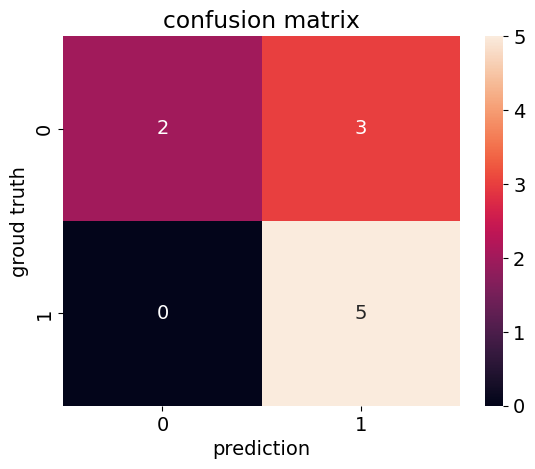

In [9]:
cm = confusion_matrix(df['clients'], df['first_model'])
sns.heatmap(cm, annot=True)

plt.title('confusion matrix')
plt.xlabel('prediction')
plt.ylabel('groud truth');